In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
from pycaret.classification import *

In [6]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
data['TotalCharges']=data["TotalCharges"].replace(r'\s+',np.nan,regex=True)
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

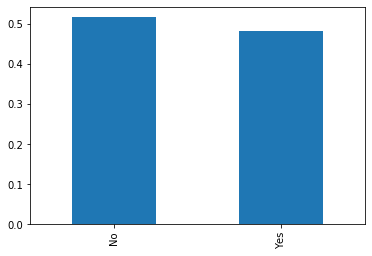

In [8]:
data.Partner.value_counts(normalize=True).plot(kind='bar')

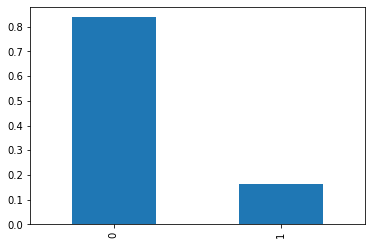

In [9]:
data.SeniorCitizen.value_counts(normalize=True).plot(kind='bar')

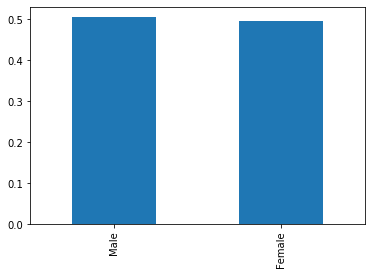

In [10]:
data.gender.value_counts(normalize=True).plot(kind='bar')

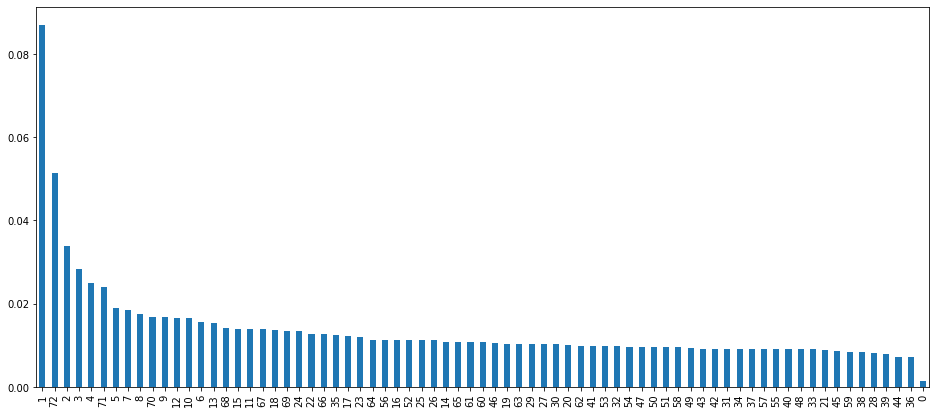

In [11]:
data.tenure.value_counts(normalize=True).plot(kind='bar',figsize=(16,7))

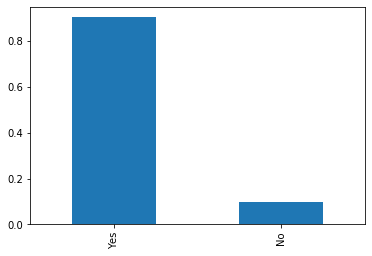

In [12]:
data.PhoneService.value_counts(normalize=True).plot(kind='bar')

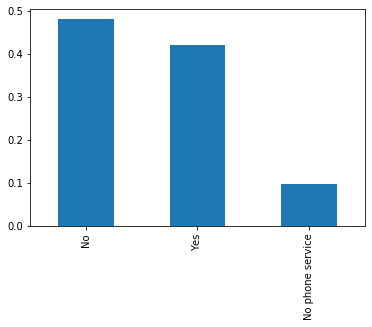

In [13]:
data.MultipleLines.value_counts(normalize=True).plot(kind='bar')

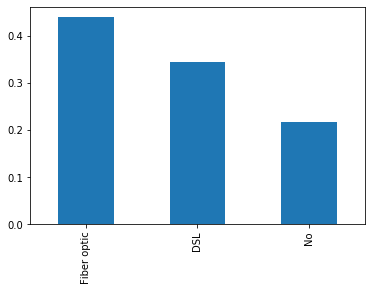

In [14]:
data.InternetService.value_counts(normalize=True).plot(kind='bar')

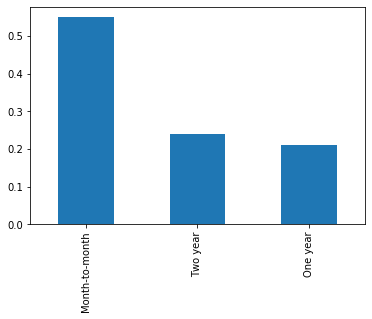

In [15]:
data.Contract.value_counts(normalize=True).plot(kind='bar')

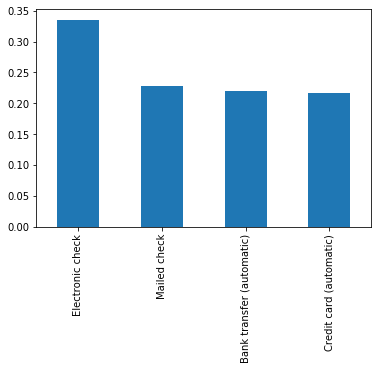

In [16]:
data.PaymentMethod.value_counts(normalize=True).plot(kind='bar')

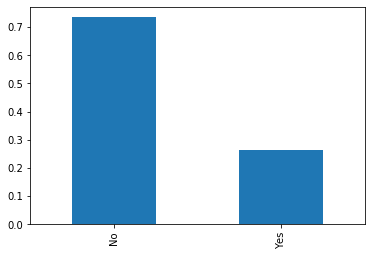

In [17]:
data.Churn.value_counts(normalize=True).plot(kind='bar')

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


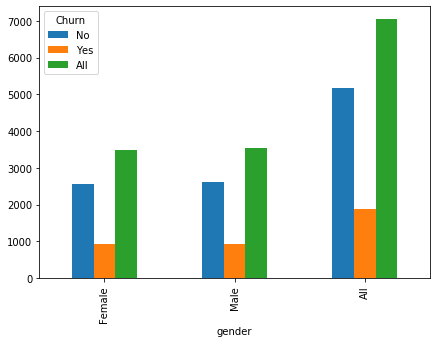

In [18]:
print(pd.crosstab(data.gender,data.Churn,margins=True))
pd.crosstab(data.gender,data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

In [19]:
print('Percent of females that left the company {0}'.format((939/1869)*100))
print('Percent of males that left the company {0}'.format((930/1869)*100))

Percent of females that left the company 50.24077046548957
Percent of males that left the company 49.75922953451043


Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


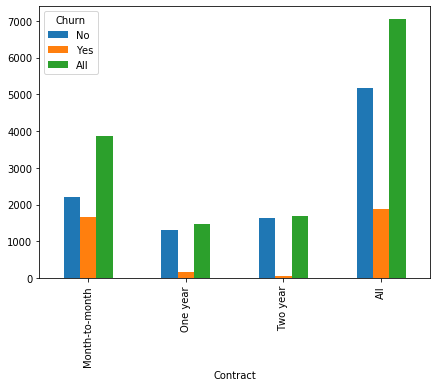

In [20]:
print(pd.crosstab(data.Contract,data.Churn,margins=True))
pd.crosstab(data.Contract,data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

In [21]:
print("% off month to month ",((1655/1869)*100))
print("% off one year ",((166/1869)*100))
print("% off two year ",((48/1869)*100))

% off month to month  88.55002675227395
% off one year  8.881754949170679
% off two year  2.568218298555377


Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


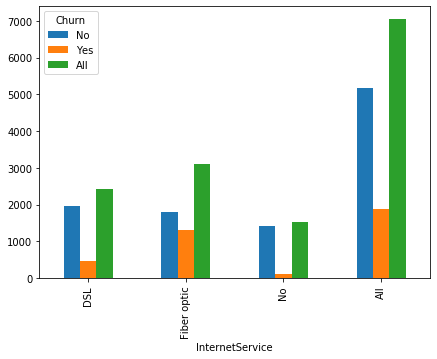

In [22]:
print(pd.crosstab(data.InternetService,data.Churn,margins=True))
pd.crosstab(data.InternetService,data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

In [23]:
print("% of DSL service",((459/1869)*100))
print("% of fibre optic",((1297/1869)*100))
print("% of No internet",((113/1869)*100))

% of DSL service 24.558587479935795
% of fibre optic 69.39539860888175
% of No internet 6.046013911182451


Churn    No   Yes   All
row_0                  
29.0   5174  1869  7043
All    5174  1869  7043


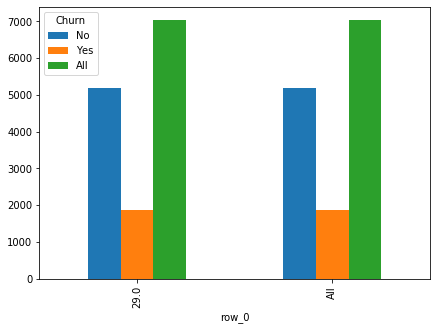

In [24]:
print(pd.crosstab(data.tenure.median(),data.Churn,margins=True))
pd.crosstab(data.tenure.median(),data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043


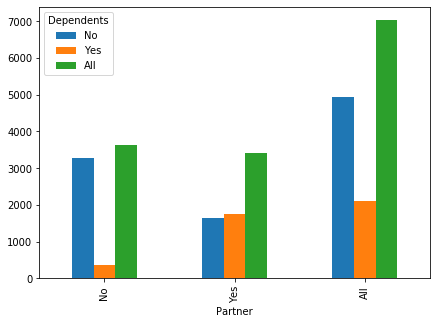

In [25]:
print(pd.crosstab(data.Partner,data.Dependents,margins=True))
pd.crosstab(data.Partner,data.Dependents,margins=True).plot(kind='bar',figsize=(7,5))

In [26]:
print("% of partner that had dependents",((1749/2110)*100))
print("% of non-partner that had dependents",((361/2110)*100))

% of partner that had dependents 82.8909952606635
% of non-partner that had dependents 17.10900473933649


Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


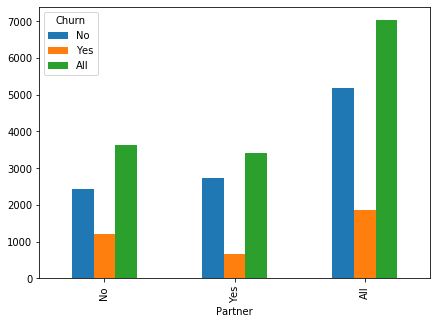

In [27]:
print(pd.crosstab(data.Partner,data.Churn,margins=True))
pd.crosstab(data.Partner,data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

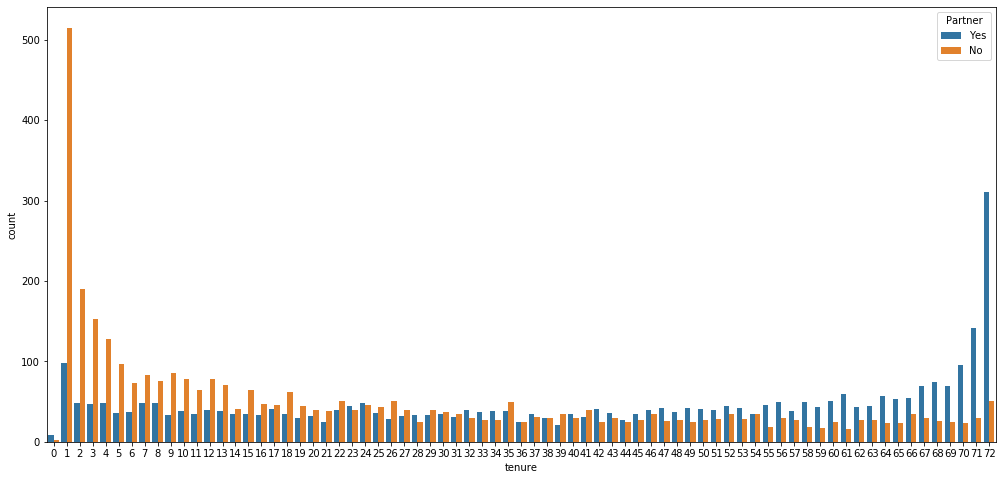

In [28]:
plt.figure(figsize=(17,8))
sns.countplot(x=data['tenure'],hue=data.Partner)

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


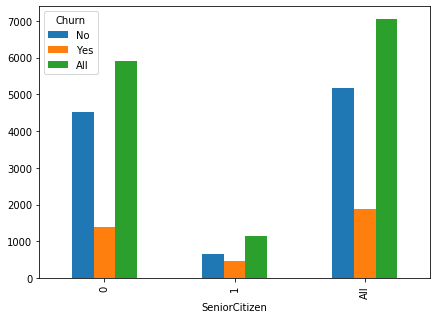

In [29]:
print(pd.crosstab(data.SeniorCitizen,data.Churn,margins=True))
pd.crosstab(data.SeniorCitizen,data.Churn,margins=True).plot(kind='bar',figsize=(7,5))

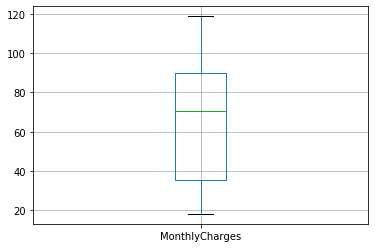

In [30]:
data.boxplot('MonthlyCharges')

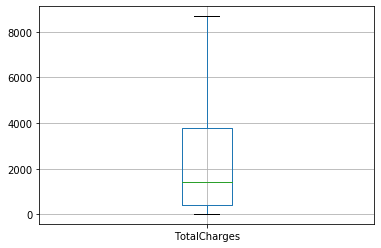

In [31]:
data.boxplot('TotalCharges')

In [32]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


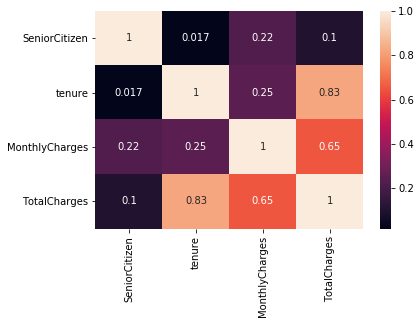

In [33]:
sns.heatmap(data.corr(),xticklabels=data.corr().columns.values,yticklabels=data.corr().columns.values,annot=True)

In [34]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [35]:
fill=data.MonthlyCharges*data.tenure

In [36]:
data.TotalCharges.fillna(fill,inplace=True)

In [37]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
data.loc[(data.Churn=='Yes'),'MonthlyCharges'].median()

79.65

In [39]:
data.loc[(data.Churn=='Yes'),'TotalCharges'].median()

703.55

In [40]:
data.loc[(data.Churn=='Yes'),'tenure'].median()

10.0

In [41]:
data.loc[(data.Churn=='Yes'),'PaymentMethod'].value_counts(normalize=True)

Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: PaymentMethod, dtype: float64

In [42]:
df=data

In [43]:
def changeColumnsToString(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df[col]=df[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColumnsToString(df)

df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [44]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,False,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,False,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,False,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [45]:

print("Payment methods: ",df.PaymentMethod.unique())
print("Contract types: ",df.Contract.unique())
print("Gender: ",df.gender.unique())
print("Senior Citizen: ",df.SeniorCitizen.unique())
print("Internet Service Types: ",df.InternetService.unique())

Payment methods:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract types:  ['Month-to-month' 'One year' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['DSL' 'Fiber optic' 'No']


In [46]:

df['gender']=df['gender'].astype('category')
df['PaymentMethod']=df['PaymentMethod'].astype('category')
df['Contract']=df['Contract'].astype('category')
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')
df['InternetService']=df['InternetService'].astype('category')
df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [47]:
dfPaymentDummies = pd.get_dummies(df['PaymentMethod'], prefix = 'payment')
dfContractDummies = pd.get_dummies(df['Contract'], prefix = 'contract')
dfGenderDummies = pd.get_dummies(df['gender'], prefix = 'gender')
dfSeniorCitizenDummies = pd.get_dummies(df['SeniorCitizen'], prefix = 'SC')
dfInternetServiceDummies = pd.get_dummies(df['InternetService'], prefix = 'IS')

print(dfPaymentDummies.head(3))
print(dfContractDummies.head(3))
print(dfGenderDummies.head(3))
print(dfSeniorCitizenDummies.head(3))
print(dfInternetServiceDummies.head(3))

   payment_Bank transfer (automatic)  payment_Credit card (automatic)  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   

   payment_Electronic check  payment_Mailed check  
0                         1                     0  
1                         0                     1  
2                         0                     1  
   contract_Month-to-month  contract_One year  contract_Two year
0                        1                  0                  0
1                        0                  1                  0
2                        1                  0                  0
   gender_Female  gender_Male
0              1            0
1              0            1
2              0            1
   SC_False  SC_True
0         1        0
1         1        0
2         1        0
   IS_DSL  IS_Fiber optic  IS_No
0 

In [48]:

df.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

df = pd.concat([df, dfPaymentDummies], axis=1)
df = pd.concat([df, dfContractDummies], axis=1)
df = pd.concat([df, dfGenderDummies], axis=1)
df = pd.concat([df, dfSeniorCitizenDummies], axis=1)
df = pd.concat([df, dfInternetServiceDummies], axis=1)
df.head(2)

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0


In [49]:

df.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No']

In [50]:

numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No'])

for columnName in numericColumns:
    df[columnName]=pd.to_numeric(df[columnName],errors='coerce')
df.dtypes

customerID                     object
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
payment_Bank_transfer_auto      uint8
payment_Credit_card_auto        uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
contract_Two_year               uint8
gender_Female                   uint8
gender_Male                     uint8
SC_False                        uint8
SC_True     

In [51]:
df

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
2,3668-QPYBK,0,0,2,1,0,1,1,0,0,...,1,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
4,9237-HQITU,0,0,2,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,24,1,1,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
7039,2234-XADUH,1,1,72,1,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
7040,4801-JZAZL,1,1,11,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
7041,8361-LTMKD,1,0,4,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df.Churn.value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

In [54]:
# Separate majority and minority classes
df_majority = df[df.Churn==0]
df_minority = df[df.Churn==1]

In [55]:
from sklearn.utils import resample

In [56]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5174,    # to match majority class
                                 random_state=123) 

In [57]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [58]:
df_upsampled

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
3,7795-CFOCW,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,1,0,1,0,0
6,1452-KIOVK,0,1,22,1,1,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
7,6713-OKOMC,0,0,10,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,3190-XFANI,0,1,49,1,1,0,0,0,1,...,0,1,0,0,1,1,0,0,1,0
3301,2636-ALXXZ,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3621,2933-FILNV,1,1,2,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
6600,4592-IWTJI,1,1,3,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [59]:
df_up=df_upsampled.sample(frac=1)

In [60]:
df_up

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
6381,0927-CNGRH,0,1,1,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
4408,2824-DXNKN,1,1,72,1,1,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
3140,7901-HXJVA,0,0,14,1,0,0,0,1,0,...,1,0,0,0,1,1,0,0,1,0
2817,0936-NQLJU,1,0,41,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
1132,5293-WXJAK,1,0,11,1,1,0,0,1,1,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2205-YMZZJ,0,0,7,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2315,2577-GVSIL,1,1,35,1,1,0,0,0,1,...,0,1,0,0,1,1,0,1,0,0
3115,4822-NGOCH,0,0,13,1,1,0,1,1,0,...,1,0,0,1,0,1,0,0,1,0
4848,5380-AFSSK,0,0,5,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0


In [61]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1869,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [62]:
df_down=df_downsampled.sample(frac=1)

In [63]:
df_down

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
1600,3068-OMWZA,0,0,1,1,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
4096,0829-XXPLX,0,0,20,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
3158,7410-KTVFV,1,0,18,1,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0
821,5318-YKDPV,1,1,43,1,0,1,0,1,1,...,0,0,1,0,1,1,0,1,0,0
2990,2309-OSFEU,0,0,10,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,7377-DMMRI,0,0,2,1,0,1,0,0,0,...,1,0,0,0,1,1,0,1,0,0
419,5564-NEMQO,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
1039,9948-YPTDG,1,0,38,1,0,1,1,0,0,...,1,0,0,0,1,1,0,0,1,0
4023,1686-STUHN,0,0,42,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1


In [64]:
X_up = df_up.drop('Churn', axis=1)
Y_up = df_up['Churn']

In [65]:
x_train_up, x_test_up, y_train_up, y_test_up = train_test_split(X_up, Y_up, test_size=0.2)

In [66]:
x_train_up.shape, x_test_up.shape

((8278, 29), (2070, 29))

In [67]:
y_train_up.shape, y_test_up.shape

((8278,), (2070,))

In [68]:
x_train_up

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
886,2123-AGEEN,0,0,7,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
200,9323-HGFWY,1,0,27,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
3338,1513-XNPPH,0,0,12,1,0,0,0,1,1,...,1,0,0,1,0,1,0,0,1,0
1230,0178-SZBHO,1,1,47,1,1,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
1988,3424-NMNBO,1,0,58,1,1,1,1,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,8049-WJCLQ,1,1,10,1,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0
1890,6770-XUAGN,1,1,1,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1814,5442-PPTJY,1,1,12,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
6747,5245-VDBUR,1,0,52,0,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [69]:
x_down = df_down.drop('Churn', axis=1)
y_down = df_down['Churn']

In [70]:
x_train_down, x_test_down, y_train_down, y_test_down = train_test_split(x_down, y_down, test_size=0.2)

In [71]:
x_train_down.shape, x_test_down.shape

((2990, 29), (748, 29))

In [72]:
y_train_down.shape, y_test_down.shape

((2990,), (748,))

In [73]:
x_train=x_train_up.drop('customerID', axis=1)
x_test=x_test_up.drop('customerID', axis=1)

In [74]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train_up)

In [75]:
y_pred = logistic_model.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

### Saving the model

In [174]:
import pickle

In [175]:
pickle.dump(logistic_model, open("logistic_churn_model.sav", 'wb'))

In [76]:
pred_results = pd.DataFrame({'y_test': y_test_up,
                             'y_pred': y_pred})

In [77]:
pred_results.head()

,y_test,y_pred
2156,1,1
6064,1,1
1281,0,0
442,0,0
5529,0,0


In [78]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

titanic_crosstab

y_test,0,1
y_pred,,
0,748,188
1,313,821


In [79]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [80]:
acc = accuracy_score(y_test_up, y_pred)
prec = precision_score(y_test_up, y_pred)
recall = recall_score(y_test_up, y_pred)
f1 = f1_score(y_test_up, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

accuracy_score :  0.7579710144927536
precision_score :  0.7239858906525574
recall_score :  0.8136769078295342
f1_score :  0.7662155856276248


In [81]:
cf_matrix=confusion_matrix(y_pred, y_test_up)
cf_matrix

array([[748, 188],
       [313, 821]], dtype=int64)

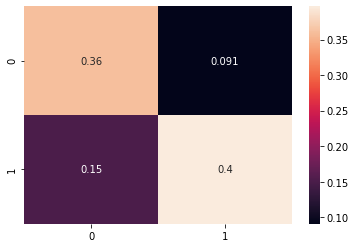

In [82]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True)

In [83]:
from sklearn.metrics import classification_report

In [84]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test_up, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.70      0.75      1061
     class 1       0.72      0.81      0.77      1009

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
sk_tree_gini = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [87]:
sk_tree_gini.fit(x_train, y_train_up)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [88]:
y_pred_gini=sk_tree_gini.predict(x_test)

In [89]:
pred_results_gini= pd.DataFrame({'y_test': y_test_up,
                             'y_pred': y_pred_gini})

In [90]:
titanic_crosstab_gini = pd.crosstab(pred_results_gini.y_pred, pred_results_gini.y_test)

titanic_crosstab_gini

y_test,0,1
y_pred,,
0,712,160
1,349,849


In [91]:
acc_gini = accuracy_score(y_test_up, y_pred_gini)
prec_gini = precision_score(y_test_up, y_pred_gini)
recall_gini = recall_score(y_test_up, y_pred_gini)
f1_gini = f1_score(y_test_up, y_pred_gini)
print("accuracy_score : ", acc_gini)
print("precision_score : ", prec_gini)
print("recall_score : ", recall_gini)
print("f1_score : ", f1_gini)

accuracy_score :  0.7541062801932367
precision_score :  0.7086811352253757
recall_score :  0.8414271555996036
f1_score :  0.769370185772542


In [92]:
target_names = ['class 0', 'class 1']
print("using decision tree gini")
print(classification_report(y_test_up, y_pred_gini, target_names=target_names))

using decision tree gini
              precision    recall  f1-score   support

     class 0       0.82      0.67      0.74      1061
     class 1       0.71      0.84      0.77      1009

    accuracy                           0.75      2070
   macro avg       0.76      0.76      0.75      2070
weighted avg       0.76      0.75      0.75      2070



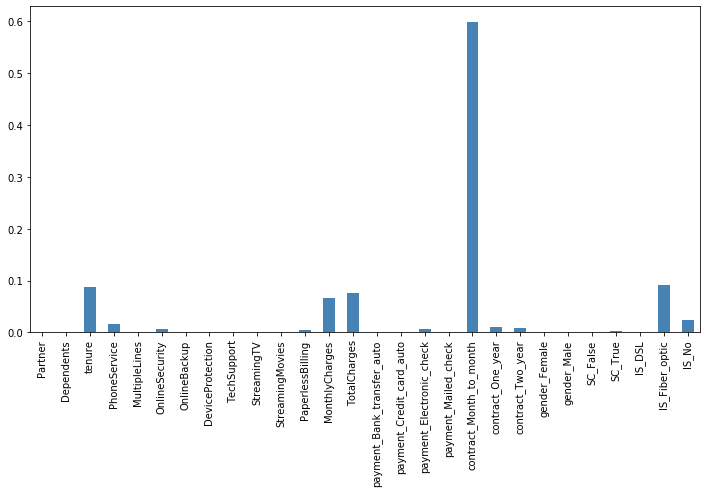

In [93]:
pd.Series(sk_tree_gini.feature_importances_, index=x_train.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [94]:
sk_tree_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [95]:
sk_tree_entropy.fit(x_train[['tenure','PhoneService','OnlineSecurity','MonthlyCharges', 'TotalCharges','contract_Month_to_month', 'contract_One_year',
       'contract_Two_year','SC_True', 'IS_DSL', 'IS_Fiber_optic']], y_train_up)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
y_pred_entropy=sk_tree_entropy.predict(x_test[['tenure','PhoneService','OnlineSecurity','MonthlyCharges', 'TotalCharges','contract_Month_to_month', 'contract_One_year',
       'contract_Two_year','SC_True', 'IS_DSL', 'IS_Fiber_optic']])

In [97]:
pred_results_entropy= pd.DataFrame({'y_test': y_test_up,
                             'y_pred': y_pred_entropy})

In [98]:
titanic_crosstab_entropy = pd.crosstab(pred_results_entropy.y_pred, pred_results_entropy.y_test)

titanic_crosstab_entropy

y_test,0,1
y_pred,,
0,710,159
1,351,850


In [99]:
acc_entropy = accuracy_score(y_test_up, y_pred_entropy)
prec_entropy= precision_score(y_test_up, y_pred_entropy)
recall_entropy= recall_score(y_test_up, y_pred_entropy)
f1_entropy = f1_score(y_test_up, y_pred_entropy)
print("accuracy_score : ", acc_entropy)
print("precision_score : ", prec_entropy)
print("recall_score : ", recall_entropy)
print("f1_score : ", f1_entropy)

accuracy_score :  0.7536231884057971
precision_score :  0.7077435470441299
recall_score :  0.8424182358771061
f1_score :  0.7692307692307693


In [100]:

target_names = ['class 0', 'class 1']
print("using decision tree entropy")
print(classification_report(y_test_up, y_pred_entropy, target_names=target_names))

using decision tree entropy
              precision    recall  f1-score   support

     class 0       0.82      0.67      0.74      1061
     class 1       0.71      0.84      0.77      1009

    accuracy                           0.75      2070
   macro avg       0.76      0.76      0.75      2070
weighted avg       0.76      0.75      0.75      2070



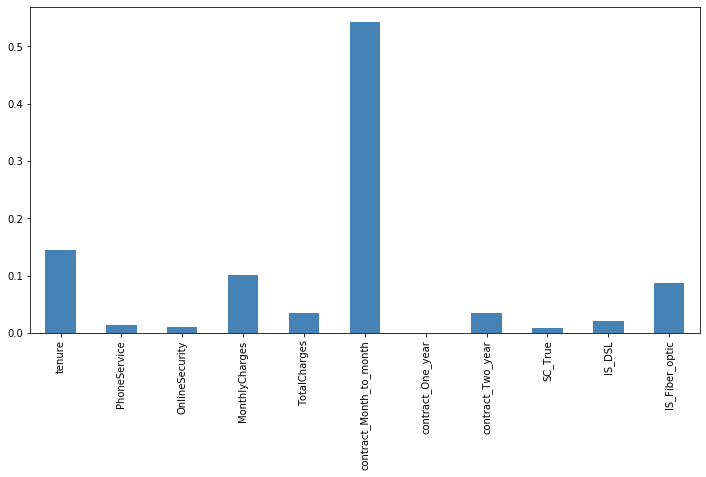

In [101]:
pd.Series(sk_tree_entropy.feature_importances_, index=x_train[['tenure','PhoneService','OnlineSecurity','MonthlyCharges', 'TotalCharges','contract_Month_to_month', 'contract_One_year',
       'contract_Two_year','SC_True', 'IS_DSL', 'IS_Fiber_optic']].columns).plot.bar(color='steelblue', figsize=(12, 6))

In [102]:
x_train_up.columns


Index(['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'payment_Bank_transfer_auto',
       'payment_Credit_card_auto', 'payment_Electronic_check',
       'payment_Mailed_check', 'contract_Month_to_month', 'contract_One_year',
       'contract_Two_year', 'gender_Female', 'gender_Male', 'SC_False',
       'SC_True', 'IS_DSL', 'IS_Fiber_optic', 'IS_No'],
      dtype='object')

In [103]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train[['tenure','PhoneService','OnlineSecurity','MonthlyCharges', 'TotalCharges','contract_Month_to_month', 'contract_One_year',
       'contract_Two_year','SC_True', 'IS_DSL', 'IS_Fiber_optic']],y_train_up)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
y_pred_rf=model.predict(x_test[['tenure','PhoneService','OnlineSecurity','MonthlyCharges', 'TotalCharges','contract_Month_to_month', 'contract_One_year',
       'contract_Two_year','SC_True', 'IS_DSL', 'IS_Fiber_optic']])

In [105]:
pred_results_rf= pd.DataFrame({'y_test': y_test_up,
                             'y_pred': y_pred_entropy})

In [106]:
crosstab_rf = pd.crosstab(pred_results_rf.y_pred, pred_results_rf.y_test)

crosstab_rf

y_test,0,1
y_pred,,
0,710,159
1,351,850


In [111]:
#df_pca=df_up.drop(['customerID','Churn'], axis=1)

In [112]:
#df_pca

In [113]:
#features=x_train.columns

In [114]:
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

In [115]:
#df_pca1 = StandardScaler().fit_transform(df_pca)

In [116]:
#pd.DataFrame(data = df_pca1, columns = features)


In [117]:
#pca = PCA(n_components=12)

In [118]:
#principalComponents = pca.fit_transform(df_pca1)

In [119]:
#principalComponents[0]

In [120]:
#principalDf = pd.DataFrame(data = principalComponents
 #            , columns = ['principal component 1','principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10','principal component 11','principal component 12'])

In [121]:
#principalDf

In [122]:
#pca.explained_variance_ratio_

In [123]:
#y=df_up[['Churn']]

In [124]:
#y

In [125]:

#x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(principalDf,y, test_size=0.2)

In [126]:
#sk_tree_pca = DecisionTreeClassifier(criterion='gini',max_depth=5)
#sk_tree_pca.fit(x_train_pca, y_train_pca)

In [127]:
#y_pred_pca=sk_tree_pca.predict(x_test_pca)

In [133]:
#acc_pca = accuracy_score(y_test_pca, y_pred_pca)
#prec_pca = precision_score(y_test_pca, y_pred_pca)
#recall_pca = recall_score(y_test_pca, y_pred_pca)
#f1_pca = f1_score(y_test_pca, y_pred_pca)
#print("accuracy_score : ", acc_pca)
#print("precision_score : ", prec_pca)
#print("recall_score : ", recall_pca)
#print("f1_score : ", f1_pca)

In [134]:
#target_names = ['class 0', 'class 1']
#print("using decision tree gini_pca")
#print(classification_report(y_test_pca, y_pred_pca, target_names=target_names))

In [148]:
#from sklearn.preprocessing import StandardScaler
#scaler1 = StandardScaler()

# Fit on training set only.
#scaler1.fit(x_train)

# Apply transform to both the training set and the test set.
#train_img = scaler1.transform(x_train)
#test_img = scaler1.transform(x_test)'''

In [136]:

#from sklearn.decomposition import PCA

In [137]:
#pca1 = PCA(.9)


In [138]:
#pca.fit(train_img)

In [139]:
#pca.n_components_

In [140]:
#train_img = pca.transform(train_img)
#test_img = pca.transform(test_img)

In [141]:
#from sklearn.linear_model import LogisticRegression

In [142]:
#logisticRegr = LogisticRegression(solver = 'lbfgs')

In [143]:
#logisticRegr.fit(train_img, y_train_up)

In [144]:
#logisticRegr.predict(test_img[0].reshape(1,-1))

In [145]:
#y_pred_pca1=logisticRegr.predict(test_img)

In [146]:

#score = logisticRegr.score(test_img, y_test_up)
#print(score)

In [147]:
#target_names = ['class 0', 'class 1']
#print("using decision tree gini_pca")
#print(classification_report(y_test_up, y_pred_pca1, target_names=target_names))

In [218]:
x_test[:1].columns
   

Index(['Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'payment_Bank_transfer_auto',
       'payment_Credit_card_auto', 'payment_Electronic_check',
       'payment_Mailed_check', 'contract_Month_to_month', 'contract_One_year',
       'contract_Two_year', 'gender_Female', 'gender_Male', 'SC_False',
       'SC_True', 'IS_DSL', 'IS_Fiber_optic', 'IS_No'],
      dtype='object')

2156    1
6064    1
1281    0
442     0
5529    0
       ..
1474    0
1229    0
5602    0
1596    0
8       1
Name: Churn, Length: 2070, dtype: int64

In [226]:
y=x_test[0:1].values
x_test[0:1].values

array([[  0.  ,   0.  ,   2.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   1.  ,   0.  ,  80.55, 184.1 ,   0.  ,   0.  ,
          1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   1.  ,   0.  ]])

In [ ]:
x_test.de

In [198]:
y

array([[  0.  ,   0.  ,  36.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   1.  ,  19.25, 679.8 ,   1.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   1.  ]])

In [217]:
loaded_model.predict(zz)

array([0], dtype=int64)

In [215]:
zz=np.array([list(z)])

In [216]:
zz

array([[  0.  ,   0.  ,  36.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   1.  ,  19.25, 679.8 ,   1.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   1.  ]])

In [222]:
data = [[  0.  ,   0.  ,  36.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   1.  ,  19.25, 679.8 ,   1.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,
          0.  ,   0.  ,   0.  ,   1. ]]

In [223]:
data


[[0.0,
  0.0,
  36.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  19.25,
  679.8,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0]]

In [224]:
loaded_model.predict(data)

array([0], dtype=int64)

In [ ]:
 query1 = request.form['query1'], query2 = request.form['query2'],query3 = request.form['query3'],query4 = request.form['query4'],query5 = request.form['query5'], query6 = request.form['query6'], query7 = request.form['query7'],query8 = request.form['query8'],query9 = request.form['query9'],query10 = request.form['query10'], query11 = request.form['query11'], query12 = request.form['query12'],query13 = request.form['query13'],query14 = request.form['query14'],query15 = request.form['query15'], query16 = request.form['query16'], query17 = request.form['query17'],query18 = request.form['query18'],query19 = request.form['query19'],query20 = request.form['query20'],query21 = request.form['query21'],query22 = request.form['query22'],query23 = request.form['query23'],query24 = request.form['query24'],query25 = request.form['query25'],query26 = request.form['query26'],,query27 = request.form['query27'],query28 = request.form['query28'])
    